In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")

In [13]:
print(df.info())
print(df.isnull().sum())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

(891, 12)

In [17]:
print(df.head(10))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  28.0      0   
6                            McCarthy, Mr. Timothy J    male  54

In [15]:
#Handle Missing Values at AGE,EMBARKED,CABIN COLUMN

In [20]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [21]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [22]:
df = df.drop(columns=["Cabin"])

In [25]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
#Converting Categorical variable to numerical variable using encoding Label Encoder and Standard Scalar

In [32]:
la = LabelEncoder()
for col in ["Sex", "Embarked"]:
    df[col] = la.fit_transform(df[col])


In [ ]:
df.drop(columns=["Name", "Ticket"], inplace=True)

In [33]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [34]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730108,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,-1.726220,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,-1.722332,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,-1.718444,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,-1.714556,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954
5,-1.710669,-0.789272,0.827377,0.737695,-0.104637,-0.474545,-0.473674,-0.478116,-0.678175
6,-1.706781,-0.789272,-1.566107,0.737695,1.893459,-0.474545,-0.473674,0.395814,0.585954
7,-1.702893,-0.789272,0.827377,0.737695,-2.102733,2.247470,0.767630,-0.224083,0.585954
8,-1.699005,1.266990,0.827377,-1.355574,-0.181487,-0.474545,2.008933,-0.424256,0.585954
9,-1.695117,1.266990,-0.369365,-1.355574,-1.180535,0.432793,-0.473674,-0.042956,-1.942303


In [35]:
df.tail(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
881,1.695117,-0.789272,0.827377,0.737695,0.279612,-0.474545,-0.473674,-0.489442,0.585954
882,1.699005,-0.789272,0.827377,-1.355574,-0.565736,-0.474545,-0.473674,-0.436671,0.585954
883,1.702893,-0.789272,-0.369365,0.737695,-0.104637,-0.474545,-0.473674,-0.437007,0.585954
884,1.706781,-0.789272,0.827377,0.737695,-0.335187,-0.474545,-0.473674,-0.506472,0.585954
885,1.710669,-0.789272,0.827377,-1.355574,0.740711,-0.474545,5.732844,-0.061999,-0.678175
886,1.714556,-0.789272,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.585954
887,1.718444,1.266990,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.585954
888,1.722332,-0.789272,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.585954
889,1.726220,1.266990,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.942303
890,1.730108,-0.789272,0.827377,0.737695,0.202762,-0.474545,-0.473674,-0.492378,-0.678175


In [36]:
#Normalize/Standardize numerical features

In [37]:
scaler = StandardScaler()   
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [38]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730108,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,-1.726220,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,-1.722332,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,-1.718444,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,-1.714556,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954
5,-1.710669,-0.789272,0.827377,0.737695,-0.104637,-0.474545,-0.473674,-0.478116,-0.678175
6,-1.706781,-0.789272,-1.566107,0.737695,1.893459,-0.474545,-0.473674,0.395814,0.585954
7,-1.702893,-0.789272,0.827377,0.737695,-2.102733,2.247470,0.767630,-0.224083,0.585954
8,-1.699005,1.266990,0.827377,-1.355574,-0.181487,-0.474545,2.008933,-0.424256,0.585954
9,-1.695117,1.266990,-0.369365,-1.355574,-1.180535,0.432793,-0.473674,-0.042956,-1.942303


In [ ]:
#Outlier detection & removal (Boxplot)

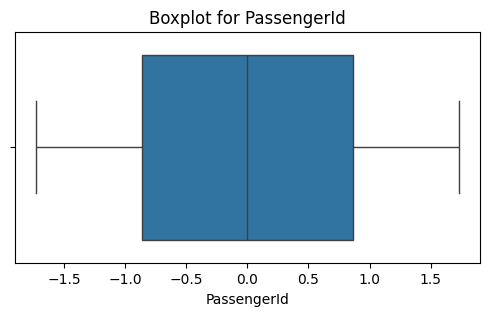

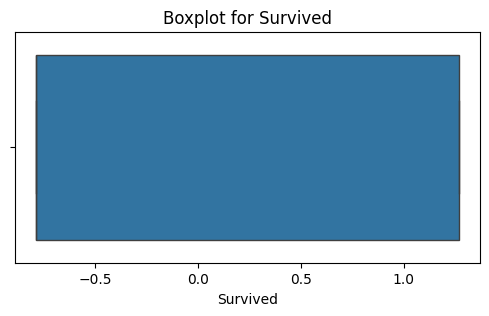

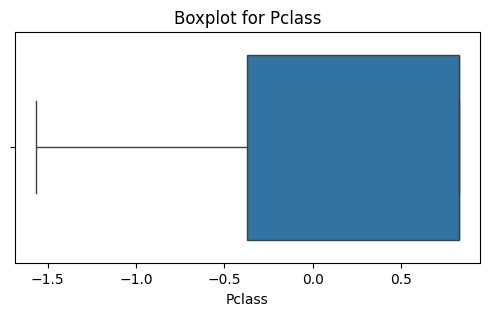

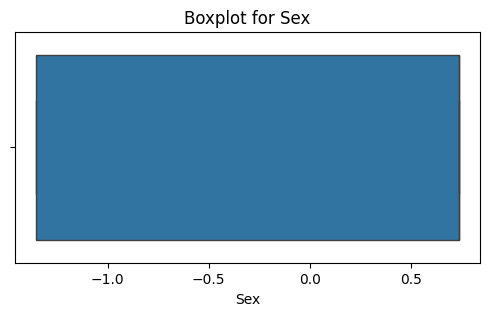

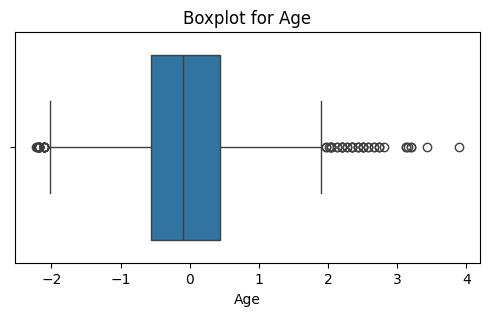

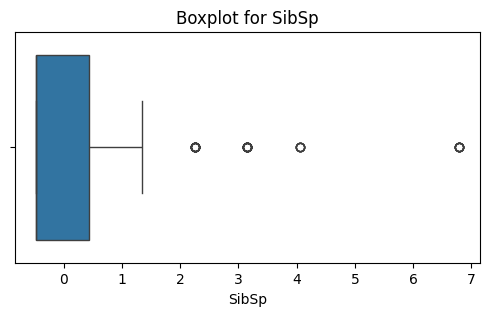

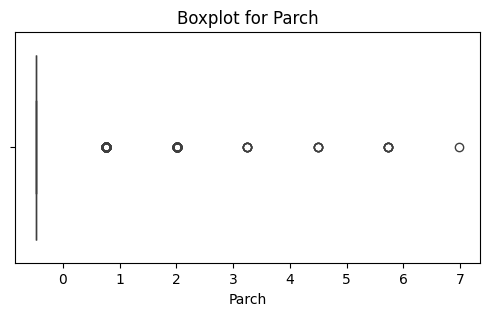

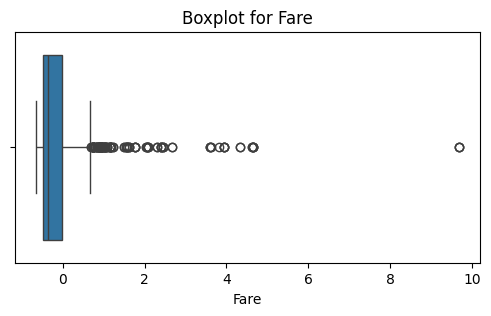

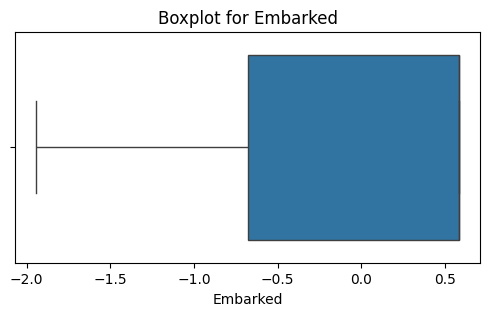

In [44]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [40]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730108,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,-1.726220,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,-1.722332,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,-1.718444,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,-1.714556,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954
5,-1.710669,-0.789272,0.827377,0.737695,-0.104637,-0.474545,-0.473674,-0.478116,-0.678175
6,-1.706781,-0.789272,-1.566107,0.737695,1.893459,-0.474545,-0.473674,0.395814,0.585954
7,-1.702893,-0.789272,0.827377,0.737695,-2.102733,2.247470,0.767630,-0.224083,0.585954
8,-1.699005,1.266990,0.827377,-1.355574,-0.181487,-0.474545,2.008933,-0.424256,0.585954
9,-1.695117,1.266990,-0.369365,-1.355574,-1.180535,0.432793,-0.473674,-0.042956,-1.942303
